In [2]:
# Import algorithms, operators and functions from CIL optimisation module
from cil.optimisation.algorithms import FISTA, CGLS
from cil.optimisation.operators import FiniteDifferenceOperator,  GradientOperator, IdentityOperator, BlockOperator
from cil.optimisation.functions import L2NormSquared, LeastSquares, IndicatorBox

# Import CIL framework
from cil.framework import BlockDataContainer

# Import CIL utilities
from cil.utilities.display import show2D
from cil.utilities import dataexample, noise

# Import from CIL ASTRA plugin
from cil.plugins.tigre import ProjectionOperator

# Import FBP from CIL recon class
from cil.recon import FBP, FDK

#Import Total Variation from the regularisation toolkit plugin
from cil.plugins.ccpi_regularisation.functions import FGP_TV

# All external imports
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np

In [3]:
# Load Rainbow image
data = dataexample.RAINBOW.get(size=(500, 500), scale=(0, 1))
data.reorder(['horizontal_y', 'horizontal_x','channel'])

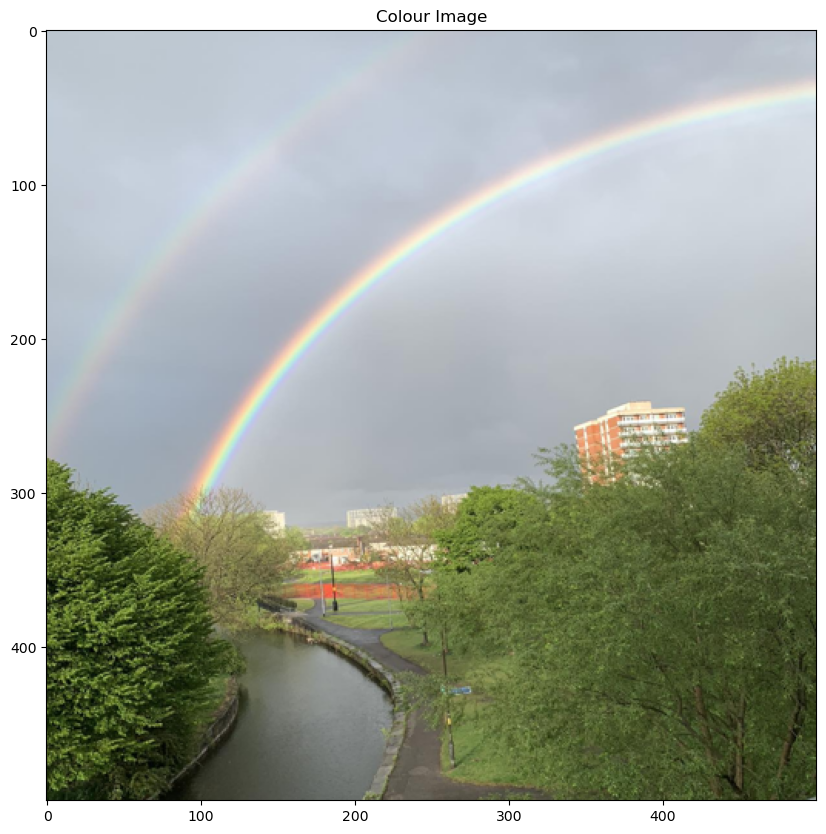

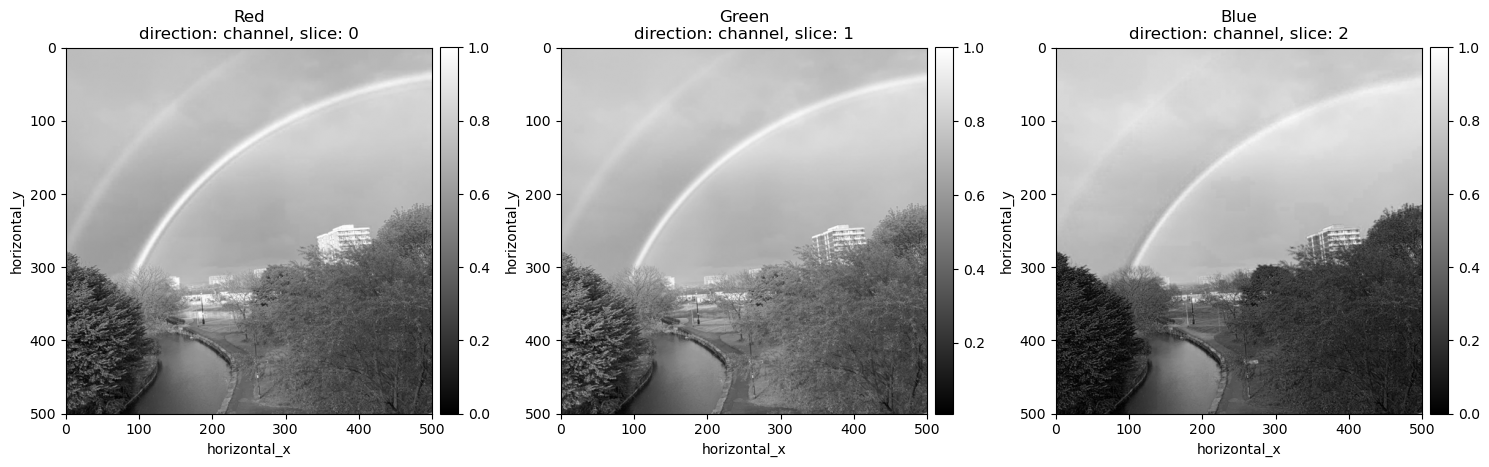

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(data.array)
plt.title("Colour Image")
plt.show()

show2D(data, slice_list=[('channel',0),('channel',1),('channel',2)],
       title=["Red","Green","Blue"], origin="upper", num_cols=3);

In [5]:
ig=data.geometry
Grad = GradientOperator(ig, correlation="SpaceChannels", backend='numpy')
Grad

In [6]:
fdx = FiniteDifferenceOperator(ig, direction='horizontal_x', bnd_cond='Neumann')
fdy = FiniteDifferenceOperator(ig, direction='horizontal_y', bnd_cond='Neumann')
fdc = FiniteDifferenceOperator(ig, direction='channel', bnd_cond='Neumann')
FD = BlockOperator(fdx, fdy, fdc)
FD

In [7]:
np.array([1,2,3])*Grad

array([<cil.optimisation.operators.Operator.ScaledOperator object at 0x7fb4385e2e70>,
      dtype=object)

In [11]:
scaled_FD = np.array([1,2,3])*FD
print(scaled_FD)
print(scaled_FD.operators)

(<cil.optimisation.operators.Operator.ScaledOperator object at 0x7fb438642ed0>, <cil.optimisation.operators.Operator.ScaledOperator object at 0x7fb438640110>, <cil.optimisation.operators.Operator.ScaledOperator object at 0x7fb438582660>)
